In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta

import warnings
warnings.filterwarnings('ignore')

In [258]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [259]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\서울열린데이터광장\서울글로벌센터 구인광고\*.json')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\서울열린데이터광장\\서울글로벌센터 구인광고\\서울글로벌센터 구인광고.json']

In [260]:
import json, pandas as pd
 
with open(files[0],encoding='utf-8') as f:
    js = json.loads(f.read()) 


df = pd.DataFrame(columns=js['DESCRIPTION'].values())

for data in js['DATA']:
    tmp_df = pd.DataFrame(columns=js['DESCRIPTION'].values())
    for c in data:
        tmp_df[js['DESCRIPTION'][c.upper()]] = [data[c]]
    df = pd.concat([df,tmp_df],ignore_index=True)
df = df.sort_values(by='식별자' ,ascending=False)
df = df.reset_index(drop=True)
df.head()

,식별자,회사홈페이지,급여,회사주소,모집요강,회사명,조회수,추가정보,회사 담당자 전화번호,채용 종료일,요구사항,등록일,게시판 식별자,회사 담당자 팩스번호,업무설명,지역코드,제목
0,28849,www.interways.co.kr,None,"211, Itaewon-ro, Yongsan-gu, Seoul, Korea",Please send your resume to \r\nyunok@interways...,Interways,84,None,02-793-8866,2022.01.31,Required qualification:\r\n- Only candidates n...,1640790000000,101,None,We are looking for a consultant to join our te...,Seoul,Consultant
1,28839,None,None,서울특별시 성동구 아차산로7나길 18 APEX CENTER 508호,1. Recruitment Procedures\r\n\r\n- Deadline fo...,LIVE WITH,112,1. Location of office in English: \r\n APEX ...,02-468-0601,2022.02.28,1. Excellent working knowledge of Adobe Creati...,1640617200000,101,02-468-0601,Company introduction: \r\n\r\n LIVE WITH (리브...,Seoul,Video Editor ( Intern Position )
2,28838,None,None,서울특별시 성동구 아차산로7나길 18 APEX CENTER 508호,How to apply (all documents should be in Korea...,LIVE WITH,244,1. Location of office in English: \r\n APEX ...,02-468-0601,2022.02.28,1. Academic background: Bachelor's degree or h...,1640617200000,101,02-468-0601,Company Introduction:\r\n\r\n LIVE WITH (리브위...,Seoul,Marketing Associate ( Intern Position )
3,28837,None,None,서울특별시 성동구 아차산로7나길 18 APEX CENTER 508호,How to apply (all documents should be in Kore...,LIVE WITH,111,1. Location of office in English: \r\n APEX ...,02-468-0601,2022.02.28,"1. Good negotiation and coordination skills, p...",1640617200000,101,02-468-0601,Company introduction: \r\n\r\n LIVE WITH (리브...,Seoul,Operation Assistant ( Intern Position)
4,28836,None,None,서울특별시 성동구 아차산로7나길 18 APEX CENTER 508호,How to apply (all documents should be in Ko...,LIVE WITH,184,1. Location of office in English: \r\n APEX ...,02-468-0601,2022.02.28,"1.Excellent coordination skills, smartly and e...",1640617200000,101,02-468-0601,Company Introduction: \r\n\r\n LIVE WITH (리브위...,Seoul,Education Assistant (Intern Position)


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   식별자          780 non-null    object
 1   회사홈페이지       652 non-null    object
 2   급여           378 non-null    object
 3   회사주소         780 non-null    object
 4   모집요강         667 non-null    object
 5   회사명          780 non-null    object
 6   조회수          780 non-null    object
 7   추가정보         494 non-null    object
 8   회사 담당자 전화번호  466 non-null    object
 9   채용 종료일       768 non-null    object
 10  요구사항         734 non-null    object
 11  등록일          780 non-null    object
 12  게시판 식별자      780 non-null    object
 13  회사 담당자 팩스번호  180 non-null    object
 14  업무설명         780 non-null    object
 15  지역코드         759 non-null    object
 16  제목           780 non-null    object
dtypes: object(17)
memory usage: 103.7+ KB


In [262]:
df.describe(include=np.object)

,식별자,회사홈페이지,급여,회사주소,모집요강,회사명,조회수,추가정보,회사 담당자 전화번호,채용 종료일,요구사항,등록일,게시판 식별자,회사 담당자 팩스번호,업무설명,지역코드,제목
count,780,652,378,780,667,780,780,494,466,768,734,780,780,180,780,759,780
unique,780,343,184,478,607,384,674,442,250,390,704,523,1,105,753,12,659
top,28849,www.piip.co.kr,0,"790-17 Hannam-Dong, #101 Yongsan-Gu, Seoul, Ko...",* Process : Document screening >> interview an...,SUIT MAKE,1408,COMPENSATION\r\n\r\nThis is an unpaid internsh...,02-566-0361,2021.12.31,* Master’s Degree preferred.\r\n\r\n* Exposure...,1615734000000,101,02-566-0364,• To use most of your time for marketing activ...,Seoul,Executive Recruiter
freq,1,18,53,26,7,36,4,8,16,33,5,11,780,16,5,603,9


In [263]:
df.isnull().sum()

식별자              0
회사홈페이지         128
급여             402
회사주소             0
모집요강           113
회사명              0
조회수              0
추가정보           286
회사 담당자 전화번호    314
채용 종료일          12
요구사항            46
등록일              0
게시판 식별자          0
회사 담당자 팩스번호    600
업무설명             0
지역코드            21
제목               0
dtype: int64

**구인 광고를 가장 많이 낸 회사는?**

**연도별,월별 광고 등록 수는?**

**커뮤니케이션과 협업능력을 얼마나 요구할까?**

**학사,석사를 얼마나 요구할까?**

**한국어,영어,중국어를 얼마나 요구할까?**

**이력서를 보는 곳은 얼마나 될까?**

**지역별 광고 수는?**


## 전처리

In [264]:
df['급여'].fillna('0',inplace=True)
df.drop(df[df['채용 종료일'].isnull()].index,inplace=True)
df.fillna('empty',inplace=True)

In [ ]:
df.astype({'식별자':'int'})
df.astype({'조회수':'int'})

In [266]:
import time
def to_year(x):
    return time.localtime(float(x/1000)).tm_year
    
def to_month(x):
    return time.localtime(float(x/1000)).tm_mon
    
def to_day(x):
    return time.localtime(float(x/1000)).tm_mday

def to_weekday(x):
    return time.localtime(float(x/1000)).tm_wday

df['등록연도'] = df['등록일'].apply(to_year)
df['등록월'] = df['등록일'].apply(to_month)
df['등록일'] = df['등록일'].apply(to_day)
df['등록요일'] = df['등록일'].apply(to_weekday)
df.drop(['등록일','게시판 식별자'],axis=1,inplace=True)    

In [268]:
df.reset_index(drop=True,inplace=True)

In [269]:
df['요구사항'] = pd.Series(df['요구사항'].values).str.lower()

## 시각화

[Text(0.5, 1.0, '구인 광고 수 top 10'), Text(0.5, 0, 'count')]

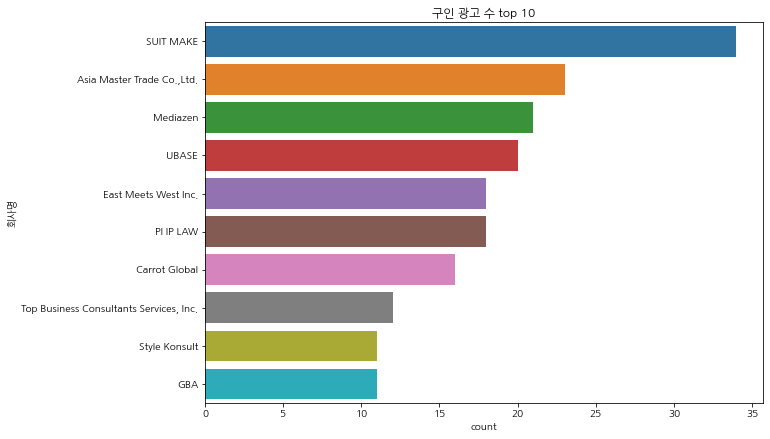

In [271]:
sub_df = df.groupby(by=['회사명'],as_index=False)['식별자'].count()
plt.figure(figsize=(10,7))
sns.barplot(data=sub_df.sort_values('식별자',ascending=False).head(10),x='식별자',y='회사명').set(title='구인 광고 수 top 10',xlabel='count')

[Text(0.5, 1.0, '요일별 등록 수')]

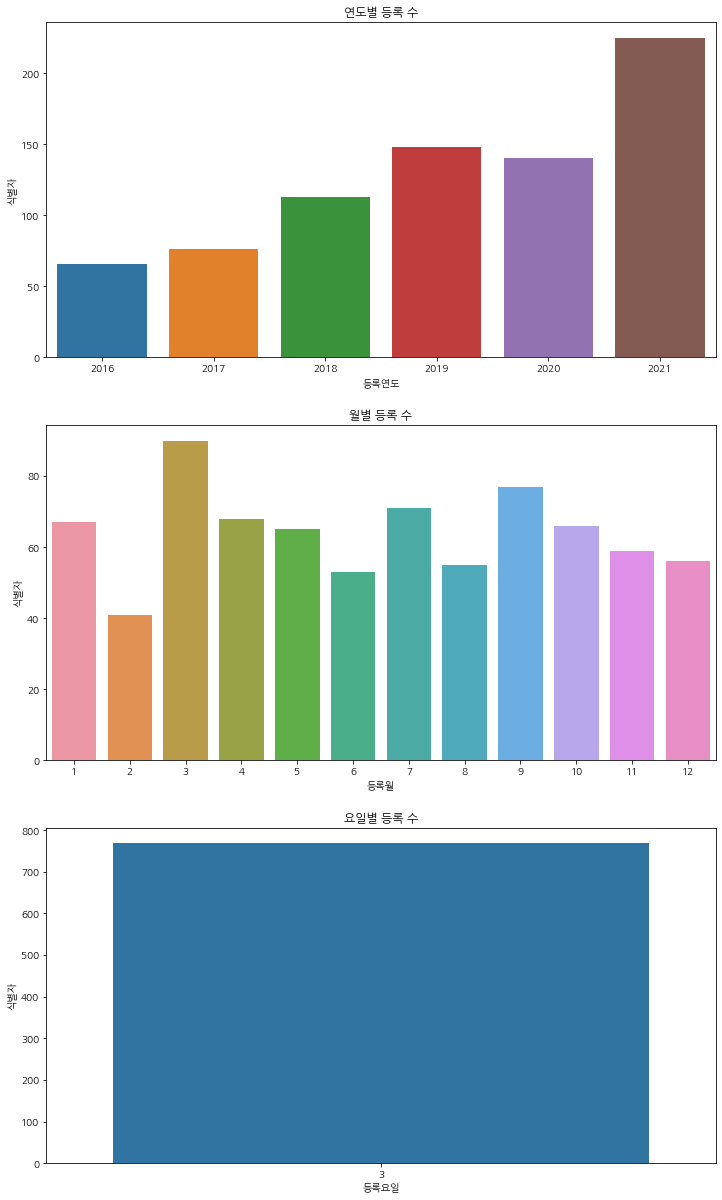

In [281]:
sub_df1 = df.groupby(by=['등록연도'],as_index=False)['식별자'].count()
sub_df2 = df.groupby(by=['등록월'],as_index=False)['식별자'].count()
sub_df3 = df.groupby(by=['등록요일'],as_index=False)['식별자'].count()
fig,axes = plt.subplots(3,1,figsize=(12,21))
sns.barplot(data=sub_df1,x='등록연도',y='식별자',ax=axes[0]).set(title='연도별 등록 수')
sns.barplot(data=sub_df2,x='등록월',y='식별자',ax=axes[1]).set(title='월별 등록 수')
sns.barplot(data=sub_df3,x='등록요일',y='식별자',ax=axes[2]).set(title='요일별 등록 수')

<AxesSubplot: xlabel='요구사항', ylabel='count'>

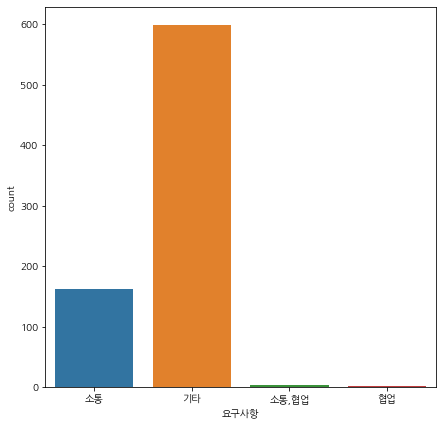

In [273]:
demands = []
for i in range(len(df)):
    x = df['요구사항'].loc[i].lower()
    if 'communication' in x and 'coordination' in x:
        demands.append('소통,협업')
    elif 'communication' in x:
        demands.append('소통')
    elif 'coordination' in x:
        demands.append('협업')
    else:
        demands.append('기타')
sub_df = pd.DataFrame(demands,columns=['요구사항'])
plt.figure(figsize=(7,7))
sns.countplot(data=sub_df,x='요구사항')

<AxesSubplot: xlabel='요구사항', ylabel='count'>

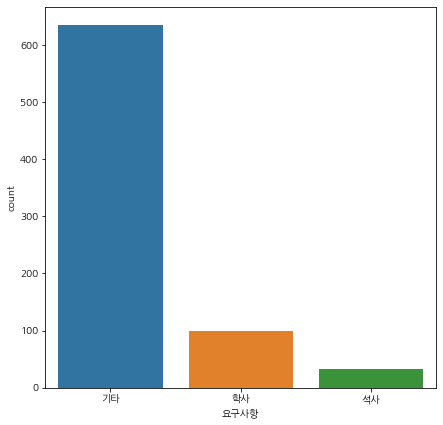

In [274]:
demands = []
for i in range(len(df)):
    x = df['요구사항'].loc[i].lower()
    if 'bachelor' in x:
        demands.append('학사')
    elif 'master' in x:
        demands.append('석사')
    else:
        demands.append('기타')
sub_df = pd.DataFrame(demands,columns=['요구사항'])
plt.figure(figsize=(7,7))
sns.countplot(data=sub_df,x='요구사항')

<AxesSubplot: xlabel='요구사항', ylabel='count'>

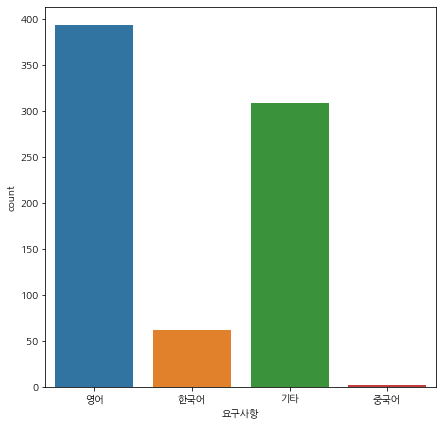

In [275]:
demands = []
for i in range(len(df)):
    x = df['요구사항'].loc[i].lower()
    if 'english' in x:
        demands.append('영어')
    elif 'korean' in x:
        demands.append('한국어')
    elif 'chinese' in x:
        demands.append('중국어')
    else:
        demands.append('기타')
sub_df = pd.DataFrame(demands,columns=['요구사항'])
plt.figure(figsize=(7,7))
sns.countplot(data=sub_df,x='요구사항')

<AxesSubplot: xlabel='모집요강', ylabel='count'>

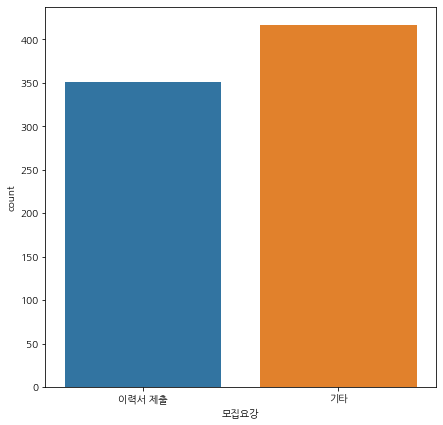

In [276]:
demands = []
for i in range(len(df)):
    x = df['모집요강'].loc[i].lower()
    if 'resume' in x:
        demands.append('이력서 제출')
    else:
        demands.append('기타')
sub_df = pd.DataFrame(demands,columns=['모집요강'])
plt.figure(figsize=(7,7))
sns.countplot(data=sub_df,x='모집요강')

<AxesSubplot: xlabel='지역코드', ylabel='count'>

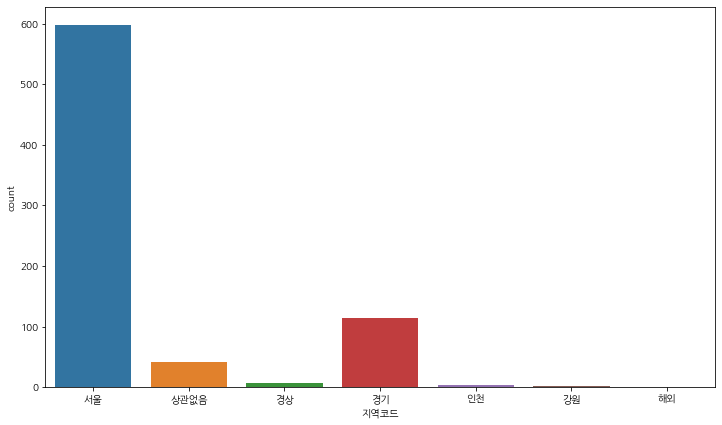

In [292]:
area = []
for i in range(len(df)):
    x = df['지역코드'].loc[i]
    if 'Seoul' in x:
        area.append('서울')
    elif 'Gyeonggi' in x:
        area.append('경기')
    elif 'Gyeongsang' in x:
        area.append('경상')
    elif 'Inchon' in x:
        area.append('인천')
    elif 'Kangwon' in x:
        area.append('강원')
    elif 'Overseas' in x:
        area.append('해외')
    else:
        area.append('상관없음')
sub_df = pd.DataFrame(area,columns=['지역코드'])
plt.figure(figsize=(12,7))
sns.countplot(data=sub_df,x='지역코드')

## 분석 결과

**구인 광고를 가장 많이 낸 회사는?**

- SUIT MAKE라는 회사가 약 34건정도의 구인 광고를 냈다.

**연도별,월별 광고 등록 수는?**

- 해가 지날수록 광고 등록수가 증가한다.

- 3월과 9월에 구인 광고수가 특히 높고, 2월이 특히 낮다.

- 목요일에만 구인 광고를 등록한다.

- 나머지 월은 꾸준하게 구인 광고가 올라온다.

**커뮤니케이션과 협업능력을 얼마나 요구할까?**

- 소통을 굉장히 중요하게 여기고, 협업은 크게 요구하지 않는다.

**학사,석사를 얼마나 요구할까?**

- 최소 요구 학력은 학사가 석사보다 높지만, 학사 이상을 요구하지 않는 곳이 대부분이다.

**한국어,영어,중국어를 얼마나 요구할까?**

- 대부분 영어를 굉장히 중요하게 여기고, 한국어를 크게 요구하지 않는다.

- 중국어를 요구하는 곳은 거의 없다.

**이력서를 보는 곳은 얼마나 될까?**

- 약 절반정도의 기업이 이력서 제출을 요구한다.

**지역별 광고 수는?**

- 서울이 광고 수가 가장 많고, 경기 경상 인천 강원 해외 순으로 광고 수가 많다.